In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv
/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv')
dt = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')

In [3]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
61394,61395,40,Female,54,1,5,30,Premium,Annual,279,21,1
20294,20295,48,Male,38,18,7,25,Premium,Quarterly,229,2,1
63819,63820,40,Female,22,2,1,26,Premium,Quarterly,354,2,1
30599,30600,63,Male,3,26,8,24,Basic,Monthly,772,12,0
52611,52612,55,Female,21,6,5,24,Basic,Monthly,632,20,1


In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# **EDA and Cleaning**

(array([5710., 5650., 5477., 5810., 6951., 6813., 6930., 7038., 7001.,
        6994.]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <BarContainer object of 10 artists>)

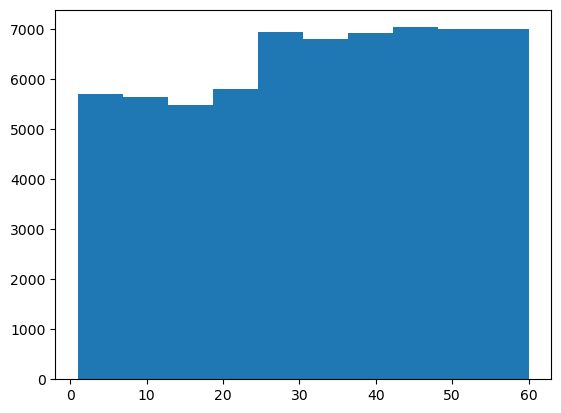

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['Tenure'])

In [6]:
df.isnull().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
df.dropna(inplace = True)
dt.dropna(inplace = True)

In [8]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Usage Frequency', ylabel='Density'>

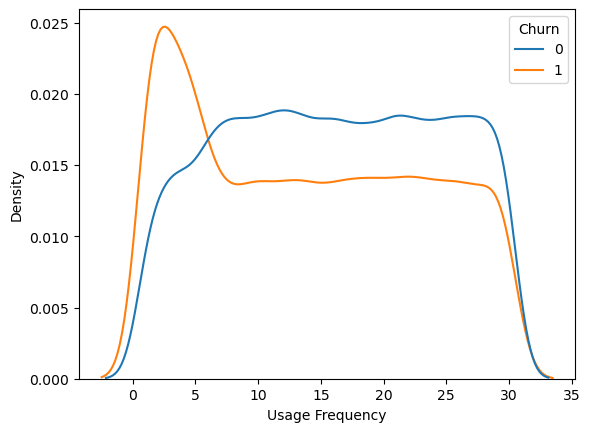

In [9]:
sns.kdeplot(data = df, x = 'Usage Frequency' , hue = 'Churn')

<Axes: xlabel='Total Spend', ylabel='Density'>

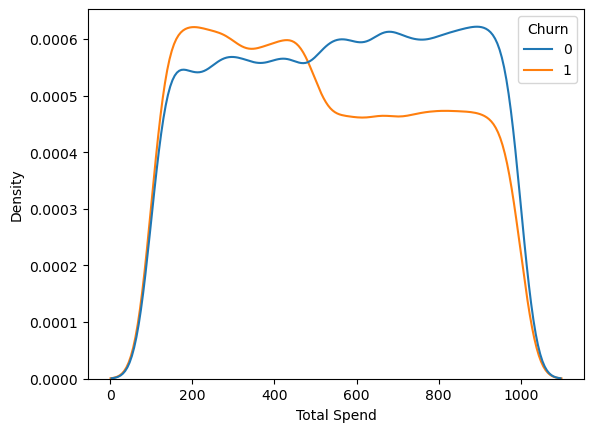

In [10]:
sns.kdeplot(data = df, x = 'Total Spend' , hue = 'Churn')

In [11]:
def cat_to_num(df, col, cat1, cat2, cat3 = None):
    df.loc[df[col] == cat1, col] = 0
    df.loc[df[col] == cat2, col] = 1
    df.loc[df[col] == cat3, col] = 2


In [12]:
cat_to_num(df, 'Subscription Type', 'Standard' , 'Basic', 'Premium')
cat_to_num(df, 'Contract Length', 'Monthly' , 'Quarterly', 'Annual')
cat_to_num(df, 'Gender', 'Male' , 'Female')

cat_to_num(dt, 'Subscription Type', 'Standard' , 'Basic', 'Premium')
cat_to_num(dt, 'Contract Length', 'Monthly' , 'Quarterly', 'Annual')
cat_to_num(dt, 'Gender', 'Male' , 'Female')


In [13]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
5582,5583,19,1,8,17,3,2,2,1,257,17,0
38891,38892,29,1,4,10,1,16,0,2,919,3,0
33371,33372,24,0,4,24,2,7,0,1,327,4,0
50924,50925,34,0,48,3,7,17,0,0,202,14,1
63588,63589,63,1,38,29,8,16,2,2,349,3,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

# Binning the Data

In [15]:
trans = KBinsDiscretizer(n_bins=7,encode='ordinal',strategy='kmeans')

In [16]:
def transform(df, cols, trans):
    for col in cols:
        trf = ColumnTransformer(
            transformers=[(col, trans, [col])]
        )
        trf_data = trf.fit_transform(df)
        df[col] = trf_data[:, 0] 
    return df

(array([6458., 6481., 6556., 5295., 6495., 6522., 5209., 7231., 6974.,
        7153.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

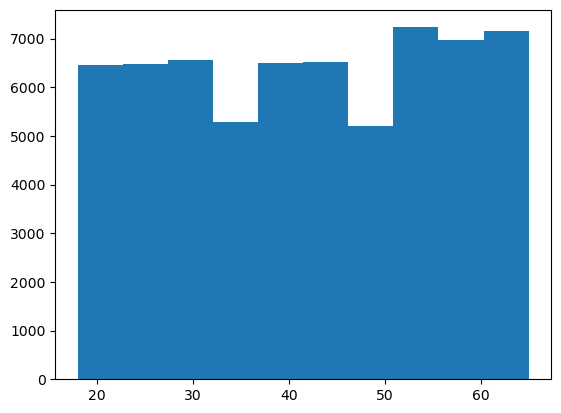

In [17]:
plt.hist(df['Age'])

In [18]:
trf_df = transform(df, ['Support Calls','Tenure','Usage Frequency', 'Total Spend', 'Last Interaction'], trans)
trf_dt = transform(df, ['Support Calls','Tenure','Usage Frequency', 'Total Spend', 'Last Interaction'], trans)

In [19]:
trf_df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
36432,36433,56,1,3.0,4.0,2.0,25,0,1,4.0,0.0,0
28431,28432,22,1,4.0,5.0,4.0,1,0,1,1.0,2.0,0
40656,40657,53,0,2.0,5.0,6.0,13,0,2,1.0,0.0,0
20625,20626,27,1,6.0,4.0,1.0,0,1,2,1.0,0.0,0
27594,27595,31,0,2.0,0.0,5.0,16,0,2,5.0,0.0,1


In [20]:
trf_df.set_index('CustomerID', inplace = True)

In [21]:
trf_dt.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
1,22,1,2.0,3.0,2.0,27,1,0,3.0,1.0,1
2,41,1,3.0,6.0,4.0,13,0,0,3.0,4.0,0
3,47,0,3.0,2.0,1.0,29,2,2,5.0,4.0,0
4,35,0,0.0,2.0,3.0,17,2,1,1.0,4.0,0
5,53,1,6.0,5.0,6.0,2,0,2,3.0,4.0,0


In [22]:
#trf_dt.set_index('CustomerID', inplace = True)

# **Model Training and Testing**

In [23]:
x_train = trf_df.iloc[:,:-1].values
y_train = trf_df.iloc[:,-1].values
x_test = trf_dt.iloc[:,:-1].values
y_test = trf_dt.iloc[:,-1].values

In [24]:
rfc = RandomForestClassifier(n_estimators=50, max_depth = 10)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

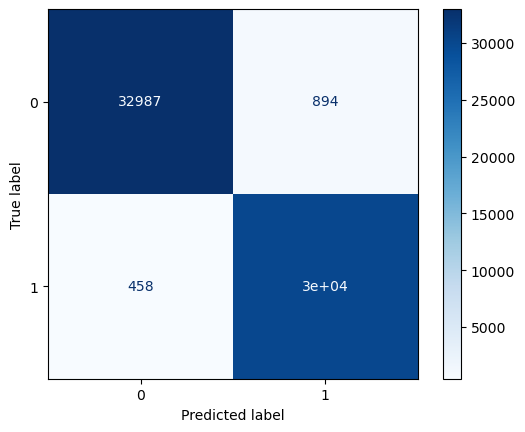

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')
#plt.figure(figsize=(20, 20))
plt.show()

In [27]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33445
           1       0.98      0.97      0.98     30929

    accuracy                           0.98     64374
   macro avg       0.98      0.98      0.98     64374
weighted avg       0.98      0.98      0.98     64374



In [28]:
print("Accuracy  : ", accuracy)
print("Precision : ", precision)
print("Recall    : ", recall)
print("F1-Score  : ", f1)

Accuracy  :  0.978997732003604
Precision :  0.9710950887516571
Recall    :  0.9849801593808415
F1-Score  :  0.9779883429390122


# Random Search CV

In [29]:
n_estimators = [25,50,100,120]
max_features = [0.3,0.6,1.0]
max_depth = [2,8,10]
max_samples = [0.5,0.75,1.0]
bootstrap = [True,False]
min_samples_split = [2, 5 , 7]
min_samples_leaf = [1, 2, 3]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }

In [30]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rfc, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    n_estimators=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, 10],
                                        'max_features': [0.3, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [25, 50, 100, 120]},
                   verbose=2)

In [31]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 10,
 'bootstrap': True}

In [32]:
rf_grid.best_score_

0.9709509941765673